<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<div style="float:right; width:98 px; height:98px;">
<img src="https://media.licdn.com/dms/image/C4E0BAQFlOZSAJABP4w/company-logo_200_200/0/1548285168598?e=2147483647&v=beta&t=g4jl8rEhB7HLJuNZhU6OkJWHW4cul_y9Kj_aoD7p0_Y" alt="STI Logo" style="height: 98px;">
</div>


<h1>Domain Check for sFWRD Files</h1>
By: Kayla Besong, PhD
    <br>
Last Edited: 05/17/24
<br>
<br>    
<br>
Thanks to xarray, selecting a domain becomes fairly easy. This code helps to visualize and narrow down exactly what lat/lons to choose for your domain. 
<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cf
import calendar
import matplotlib.patches as mpatches

In [16]:
%run ../../../../../File_concat_mod_functions.ipynb  #### PROVIDE CORRECT PATH TO THIS FILE 

In [17]:
def formatter(ax, extent, lccproj, i, y_locater_arange, x_locater_arange, plotter_truth):
    
    ''' This function is designed to format cartopy subplots as the sliding amount of panels requires that not all panels be plotted and thus,
        not all panels be formatted. This eliminates redundancy. Other parameters hard coded here such as the xlabel font size could become inputs
        but it is just as easy to change them here.

    Input Variables:

        ax: (cartopy.mpl.geoaxes.GeoAxesSubplot) The subplot object. 
        extent: (list of 4) Extent of the map in [west, east, south, north].
        lccproj: (cartopy.crs) Cartopy projection object 
        i: (int) iterable 
        y_locater_arange: (numpy.ndarray) np.arange of latitude ticks you would like plotted. Ex: np.arange(0, 80, 20)
        x_locater_arange: (numpy.ndarray) np.arange of longitude ticks you would like plotted. Ex: np.arange(-180,40, 20)
        plotter_truth: (list of two) list of boolean falues where the first item is the right labels and and the second is the left labels
        
    Output:
    
        The input ax (cartopy.mpl.geoaxes.GeoAxesSubplot) object but formatted accordingly. '''
    
    
    ax.set_extent(extent, crs = lccproj)                                                                             # Set the extent according to above
    ax.add_feature(cf.STATES, linewidth=1.5, edgecolor='grey', alpha = 0.5)                                          # Add state boundaries 
    ax.coastlines(zorder = 3, color='grey', linewidths = 1.5, alpha = 0.9)                                           # Add coastlines
    gl = ax.gridlines(color = 'lightgrey', draw_labels=True, linewidths = 1.5, x_inline=False, y_inline=False)       # Add the gridlines and the lat/lon labels

    ## most of this code is formatting the gridlines and axis labels. Edit as you wish. 
    
    gl.ylocator = mticker.FixedLocator(y_locater_arange)
    gl.xlocator = mticker.FixedLocator(x_locater_arange)

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'rotation': 0}
    gl.ylabel_style = {'size': 15, 'rotation': 0}
        
    gl.right_labels = plotter_truth[0]
    gl.left_labels = plotter_truth[1]   
        
    gl.top_labels = False

    return ax

# Database Options! 

After the database is finalized, these are the available variables and models available! Not all variables are available for all models! Plot away.

model_options = ['ERA5', 'NCEP', 'NARR', 'NAM', 'HRRR', 'CONUS404']

variable_options = ['pbl','cape','mlcape','scape','sm','vsm','u10','v10','gust','prate','tp','tcp','lspr','t2','rh','d2','ws','wd','hdw','vpd','ffwi']

time_options = ['Abs', 'AVG_Daily', 'MAX_Daily', 'MIN_Daily'] 

various example extents 

conus_extent = [-125, -67, 23, 52]
ak_extent = [-175, -135, 45, 75]
hi_extent = [-160, -154.5, 18, 23]

# Random Example 1 

Test the domain selection process. We will use ERA5 and look at the CONUS extent. Any variable or time option works since it is just a domain selection.

In [20]:
input_dir = '../../../../../database_files_final'
v = 't2'
t = 'AVG_Daily'
m = 'ERA5'

In [21]:
era_file = xr.open_mfdataset(f'{input_dir}/{m}/{v}_{get_filename(m)}_{t}*.nc')

/home/s2sfire/miniconda3/envs/noaa_s2s/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [22]:
era_file

<xarray.Dataset>
Dimensions:    (longitude: 721, latitude: 341, time: 2922)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -0.5 -0.25 0.0
  * latitude   (latitude) float32 85.0 84.75 84.5 84.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2018-12-31
Data variables:
    t2         (time, latitude, longitude) float32 dask.array<chunksize=(365, 341, 721), meta=np.ndarray>
Attributes:
    Original Grid:  latlon
    New Regrid:     no regridding, latlon

## All you have to do is change these values

In [72]:
#define your latitude/longitude box region

lat1 = 24
lat2 = 50
lon1 = -125
lon2 = -66


#### Plot formatting options

In [73]:
xlocater = np.arange(-180,40, 5)
ylocater = np.arange(20, 65, 2)
lat_formatter = np.arange(20, 70, 5)
lon_formatter = np.arange(-180,40, 5)
plotter_truth = [False, True]

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_10240/1545475119.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)
/tmp/ipykernel_10240/1545475119.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)


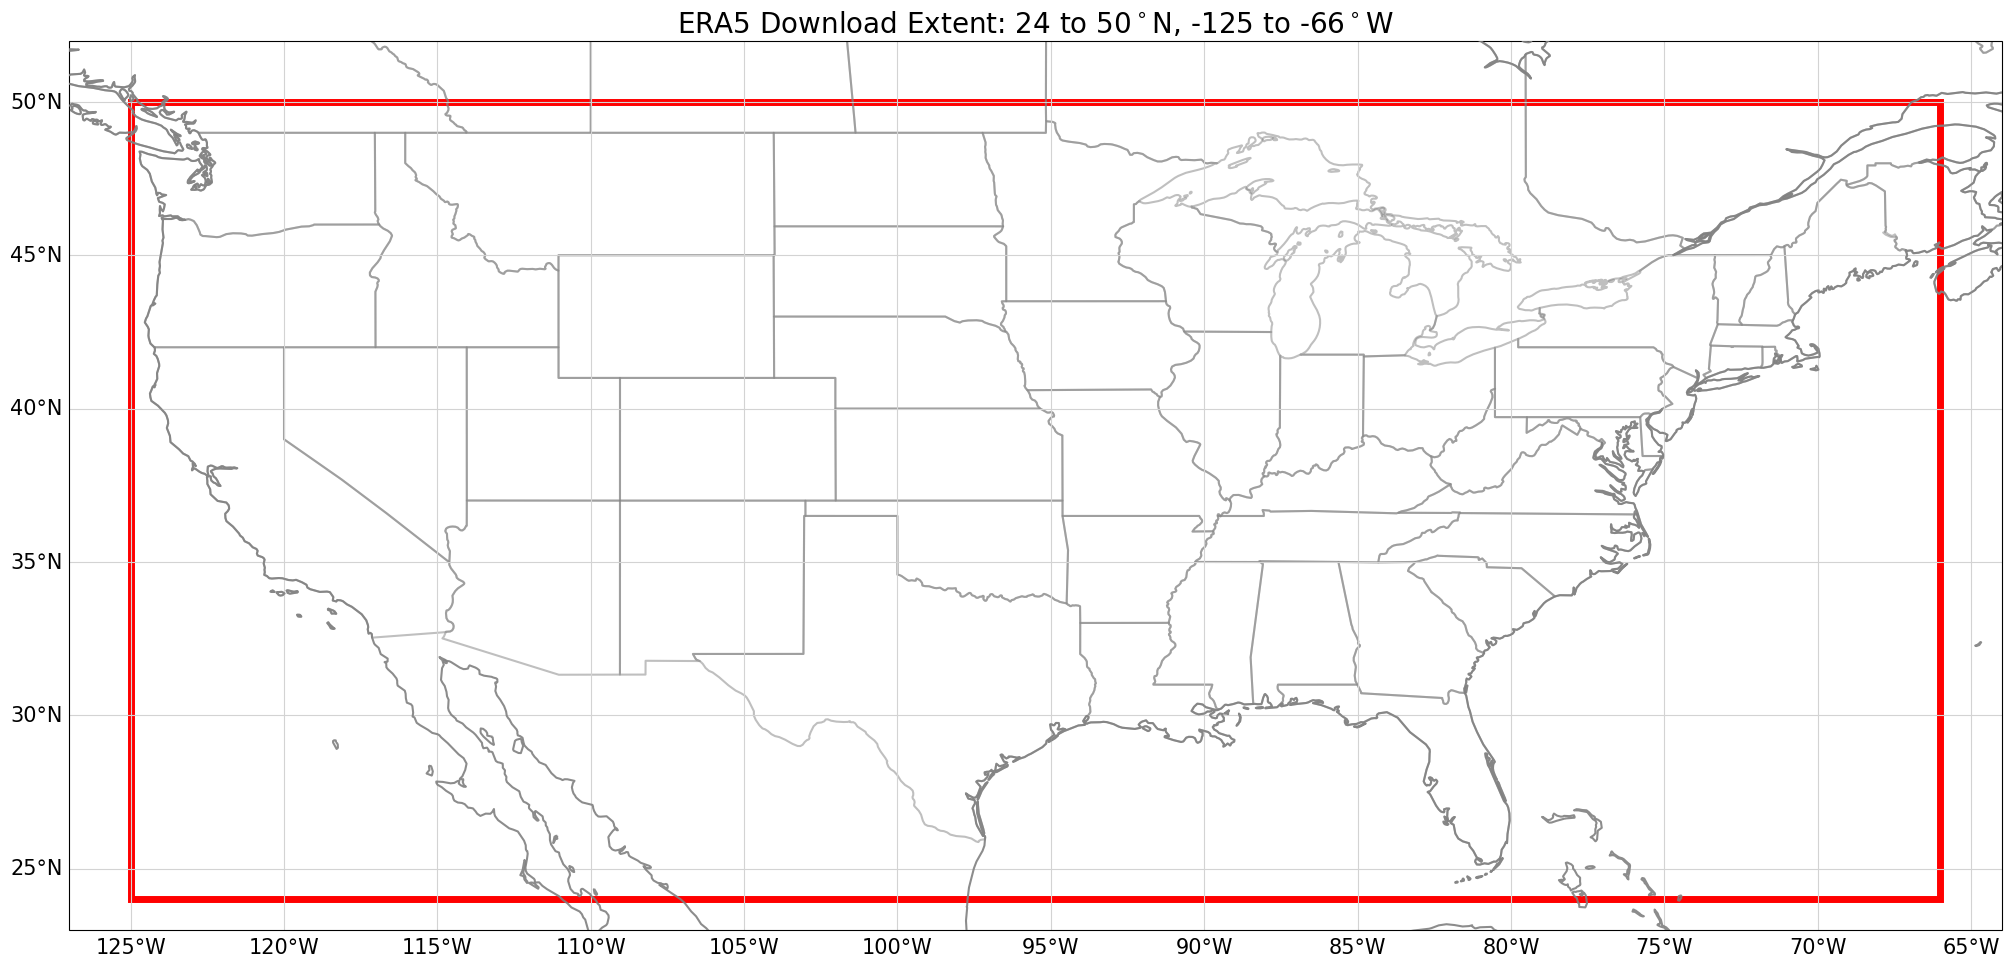

In [80]:
lccproj = ccrs.PlateCarree()                               # the local projection 
projection = ccrs.PlateCarree(central_longitude=245)  # the projection we want to see centered on the U.S. 

ncols = 1
nrows = 1
fig_size = (20,10)

## make the extent slightly larger if you'd like
extent = [-127, -64, 23, 52]

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, subplot_kw={'projection': projection},figsize=fig_size, constrained_layout=True)   # set the subplots and their projection 

c_dx = 0.5


for i in range(1):

    ax = formatter(axes, extent, lccproj, i, lat_formatter, lon_formatter, plotter_truth)

    ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)

    ## plot a red box to demonstrate your domain using the lat, lon values and their deltas
    
    ax.add_patch(mpatches.Rectangle(xy=[lon1, lat1], width=abs(lon1 - lon2), height=abs(lat1 - lat2),
                                facecolor='none', edgecolor='red', lw = 5,
                                transform=lccproj))

    # plt.savefig(f'Projects/CONUS/domain.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 
# plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_10240/2761006595.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)
/tmp/ipykernel_10240/2761006595.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)


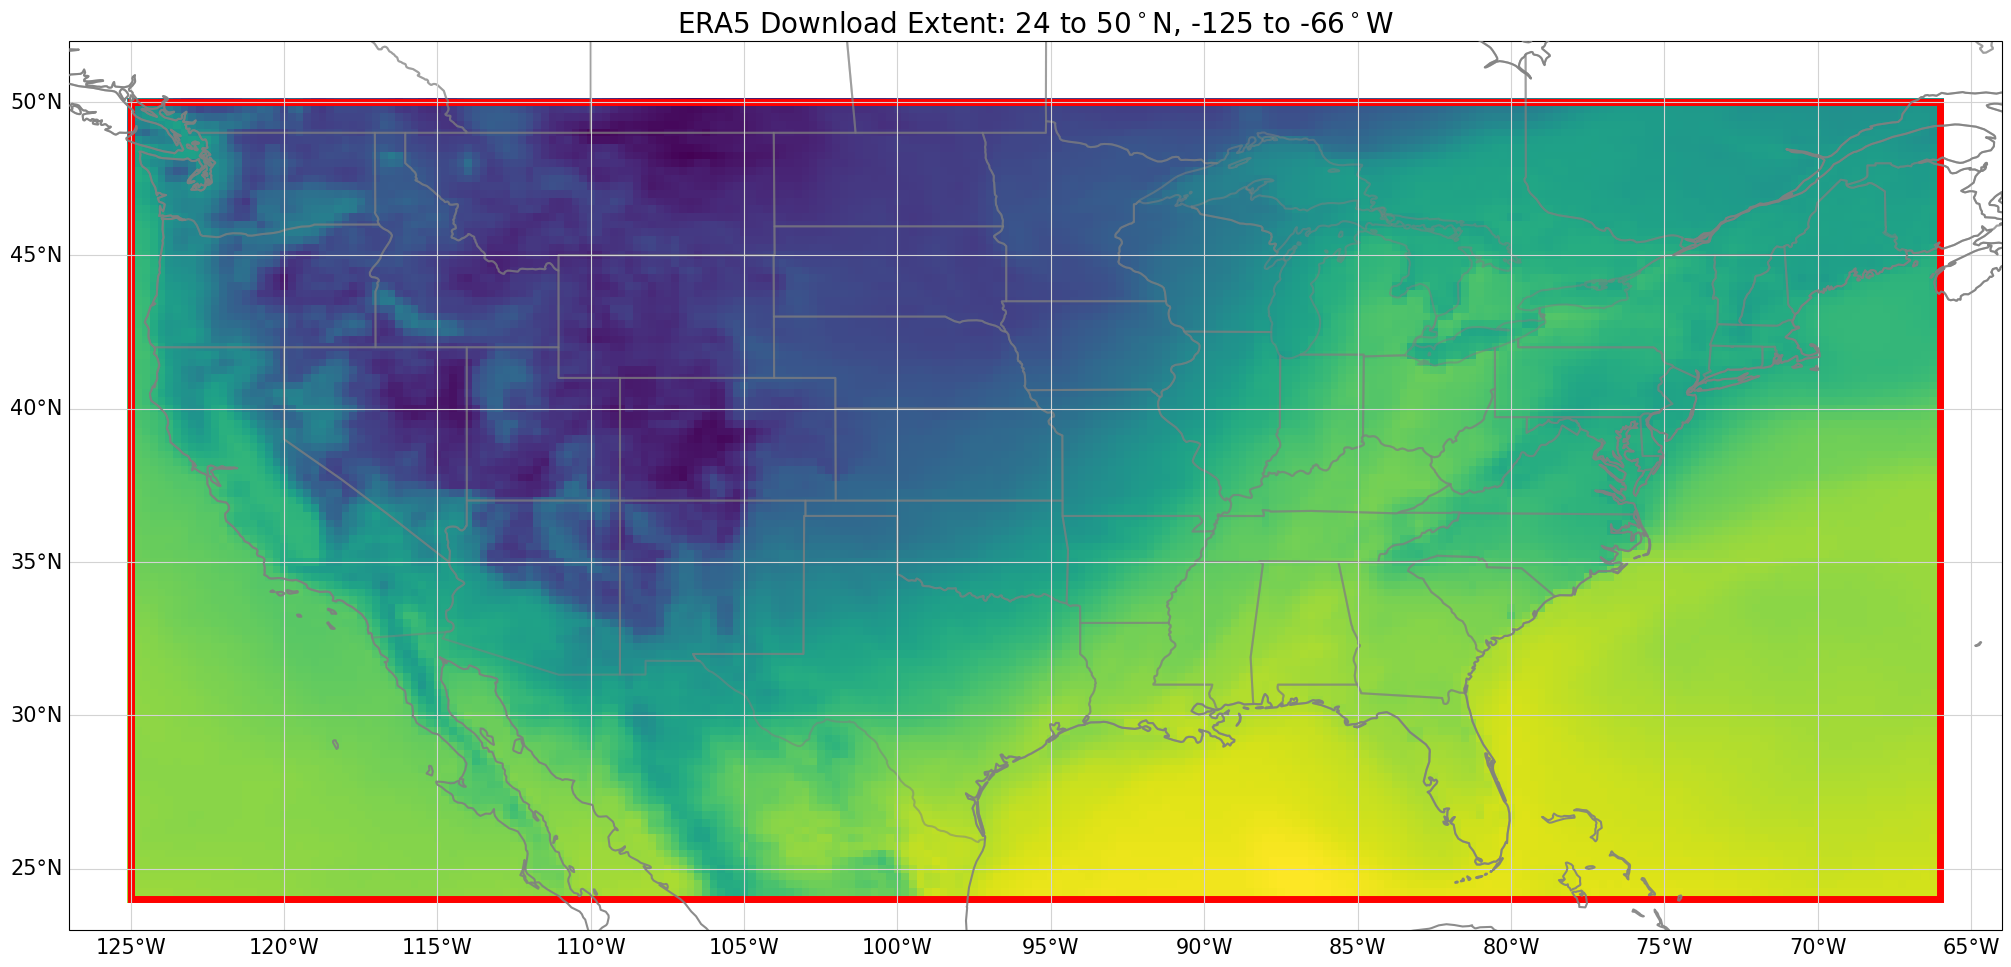

In [79]:
lccproj = ccrs.PlateCarree()                               # the local projection 
projection = ccrs.PlateCarree(central_longitude=245)  # the projection we want to see centered on the U.S. 

ncols = 1
nrows = 1
fig_size = (20,10)

## make the extent slightly larger if you'd like
extent = [-127, -64, 23, 52]

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, subplot_kw={'projection': projection},figsize=fig_size, constrained_layout=True)   # set the subplots and their projection 

c_dx = 0.5


for i in range(1):

    ax = formatter(axes, extent, lccproj, i, lat_formatter, lon_formatter, plotter_truth)

    ax.set_title(f'ERA5 Download Extent: {lat1} to {lat2}$^\circ$N, {lon1} to {lon2}$^\circ$W', fontsize = 20)

    ## plot your data to see if you like it

    era5_file_sel =  era_file.sel(latitude = slice(lat2, lat1), longitude = slice(lon1, lon2))
    
    zf = ax.pcolormesh(era5_file_sel.longitude, era5_file_sel.latitude, 
                       era5_file_sel[v].isel(time = 0),
                       transform = lccproj)     

    ## plot a red box to demonstrate your domain using the lat, lon values and their deltas
    
    ax.add_patch(mpatches.Rectangle(xy=[lon1, lat1], width=abs(lon1 - lon2), height=abs(lat1 - lat2),
                                facecolor='none', edgecolor='red', lw = 5,
                                transform=lccproj))

#fig.savefig(f'TYPEYOURPATH', bbox_inches = "tight")  
# plt.show()